<a href="https://colab.research.google.com/github/Akshay-s-kumar/3d-cnn-brain-tumor-segmentation/blob/main/Model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/LOad_Data.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **MODEL**

In [ ]:
import numpy as np
import nibabel as nib
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Precision, Recall
import tensorflow.keras.backend as K

def build_3d_cnn(input_shape, num_classes):
    inputs = layers.Input(input_shape)

    x = layers.Conv3D(24, (3, 3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv3D(24, (3, 3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(16, (3, 3, 3), activation='relu', padding='same')(x)
    x = layers.Dropout(0.3)(x)
    segmentation_output = layers.Conv3D(num_classes, (1, 1, 1), activation='softmax', name='segmentation_output')(x)

    model = models.Model(inputs, segmentation_output)
    return model

input_shape = (128, 128, 40, 4)
num_classes = 5

model = build_3d_cnn(input_shape, num_classes)
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

def get_class_labels(predictions):
    return np.argmax(predictions, axis=-1)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 40, 4)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d (Conv3D)                      │ (None, 128, 128, 40, 24)    │           2,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 40, 24)    │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 128, 128, 40, 32)    │          20,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 40, 32)    │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 128, 128, 40, 24)    │          20,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128, 128, 40, 24)    │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 128, 128, 40, 16)    │          10,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 40, 16)    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ segmentation_output (Conv3D)         │ (None, 128, 128, 40, 5)     │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,933 (214.58 KB)

 Trainable params: 54,773 (213.96 KB)

 Non-trainable params: 160 (640.00 B)

In [ ]:
train_data = train_dataset  # Your input features (e.g., MRI volumes)
train_labels = train_mask_dataset  # Your target labels (e.g., segmentation masks)

# Create a tf.data.Dataset
dataset = tf.data.Dataset.zip((train_data, train_labels))

In [ ]:

# Train
history = model.fit(
    dataset,
    epochs=1,
    batch_size=1,
    callbacks=callbacks
)

417/417 ━━━━━━━━━━━━━━━━━━━━ 10782s 26s/step - accuracy: 0.9132 - loss: 0.2631


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


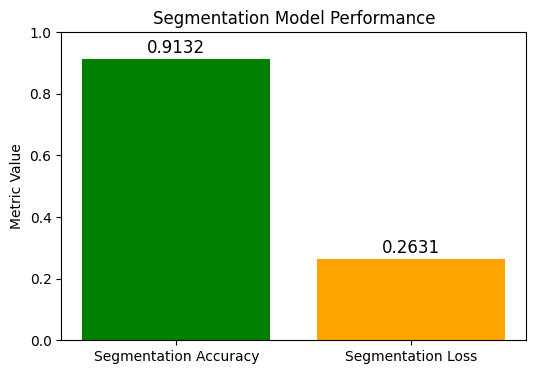

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Segmentation Accuracy', 'Segmentation Loss']
values = [0.9132, 0.2631]

# Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['green', 'orange'])
plt.ylim(0, 1)  # Set limit for better visualization
plt.title('Segmentation Model Performance')
plt.ylabel('Metric Value')

# Display values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, str(round(v, 4)), ha='center', fontsize=12)

plt.show()


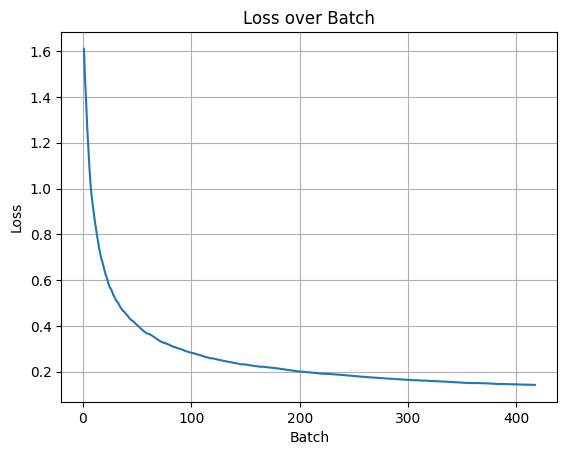

In [ ]:
# prompt: code for ploting a csv file. plot should be line graph

import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_csv_file.csv' with the actual path to your CSV file
csv_file_path = '/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS/loss_log.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Plot the data
plt.plot(df['Batch'], df['Loss'])
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Loss over Batch')
plt.grid(True)
plt.show()


In [ ]:
# Example usage
predictions = model.predict(test_dataset)  # Assuming x_test is defined
predicted_labels = get_class_labels(predictions)
print(np.unique(predicted_labels))  # Should now match [0,1,2,4]

90/90 ━━━━━━━━━━━━━━━━━━━━ 1050s 12s/step
[0 1 2 3 4]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming test_mask_dataset is a tf.data.Dataset
# Convert test_mask_dataset to a NumPy array
y_true = []  # List to store ground truth labels
for element in test_mask_dataset:
    y_true.extend(element.numpy().flatten())
y_true = np.array(y_true)  # Convert list to NumPy array

# Calculate and print the confusion matrix
cm = confusion_matrix(y_true, predicted_labels.flatten())
print("Confusion Matrix:")
print(cm)

# Generate a classification report (precision, recall, F1-score, etc.)
report = classification_report(y_true, predicted_labels.flatten())
print("Classification Report:")
print(report)

Confusion Matrix:
[[33031173  2358807   178662  1998148 20375884]
 [      28      423       67     1712    88098]
 [      72     3428      122     6102   741577]
 [       0        0        0        0        0]
 [      21      842      309     1934   194991]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.57      0.73  57942674
         1.0       0.00      0.00      0.00     90328
         2.0       0.00      0.00      0.00    751301
         3.0       0.00      0.00      0.00         0
         4.0       0.01      0.98      0.02    198097

    accuracy                           0.56  58982400
   macro avg       0.20      0.31      0.15  58982400
weighted avg       0.98      0.56      0.71  58982400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


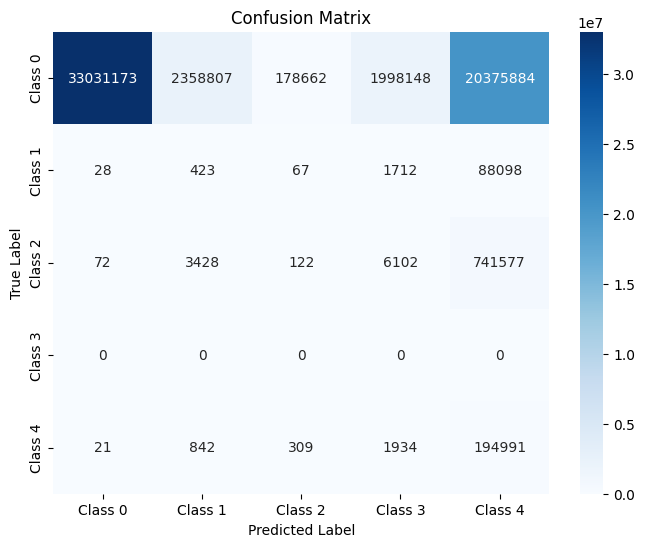

In [ ]:
# prompt: code for displaying the confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cm is already calculated using confusion_matrix
# ... (Your existing code for calculating cm) ...

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
  """
  Plots a confusion matrix using seaborn.

  Args:
    cm: The confusion matrix.
    class_names: A list of class names for labeling the matrix.
  """
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


# Get class names (replace with your actual class names)
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)



In [ ]:
val_data = val_dataset  # Your input features (e.g., MRI volumes)
val_labels = val_mask_dataset  # Your target labels (e.g., segmentation masks)

# Create a tf.data.Dataset
val_dataset = tf.data.Dataset.zip((val_data, val_labels))

In [ ]:


# Evaluate the model on the validation data
evaluation_results = model.evaluate(val_dataset)

# Print the evaluation results
print("Evaluation Results:")
print(model.metrics_names)
print(evaluation_results)


# ... other metrics


90/90 ━━━━━━━━━━━━━━━━━━━━ 1120s 12s/step - accuracy: 0.9814 - loss: 0.2467
Evaluation Results:
['loss', 'compile_metrics']
[0.2669491767883301, 0.9794610142707825]


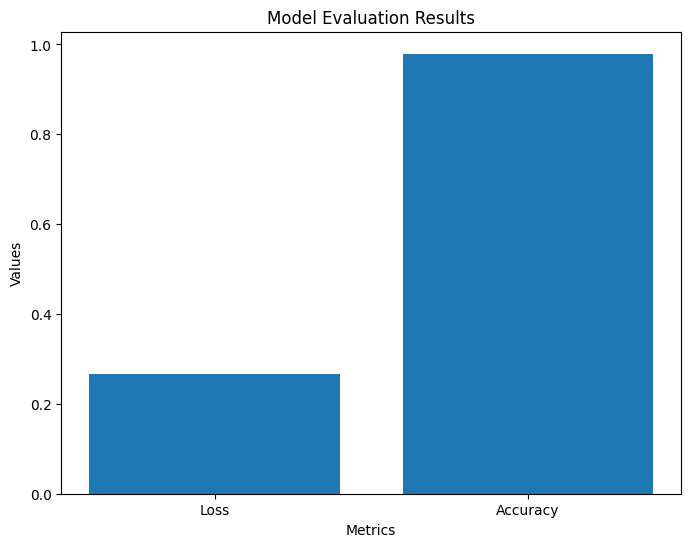

In [ ]:
# prompt: plot for displaying the evaluation result

import matplotlib.pyplot as plt

# Assuming evaluation_results contains the metrics returned by model.evaluate
# e.g., ['loss', 'accuracy', 'precision', 'recall']

# Extract the metric values from evaluation_results
loss = evaluation_results[0]
accuracy = evaluation_results[1]
# ... other metrics

# Create a list of metrics and their corresponding values
metrics = ['Loss', 'Accuracy']  # Add more metric names if needed
values = [loss, accuracy]  # Add more metric values if needed

# Plot the metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics, values)
plt.title('Model Evaluation Results')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()


In [ ]:
# prompt: save the model

# Save the entire model including architecture and weights
model.save('/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS/model_epoch_01.h5')

# Alternatively, you can save only the model weights
# model.save_weights('/content/drive/MyDrive/Colab Notebooks/my_3d_cnn_weights.h5')

print("Model saved to Google Drive.")


Model saved to Google Drive.


Stack Files

In [ ]:
import nibabel as nib
import numpy as np
import os

def load_nifti_file(nifti_path):
    return nib.load(nifti_path).get_fdata()

def stack_mri_modalities(patient_id, base_path, output_dir):
    # Define file paths using patient ID
    modalities = ["flair", "t1", "t1ce", "t2"]
    file_paths = {mod: os.path.join(base_path, f"BraTS2021_{patient_id}", f"BraTS2021_{patient_id}_{mod}.nii.gz") for mod in modalities}

    # Load MRI scans
    images = [load_nifti_file(file_paths[mod]) for mod in modalities]

    # Ensure all images have the same shape
    if not all(img.shape == images[0].shape for img in images):
        raise ValueError("All MRI modalities must have the same shape!")

    # Stack images along the last axis to create a 4-channel image
    stacked_image = np.stack(images, axis=-1)  # Shape: (X, Y, Z, 4)

    # Define output file path
    os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists
    output_path = os.path.join(output_dir, f"stacked_BraTS2021_{patient_id}.nii.gz")

    # Save the stacked image
    nifti_img = nib.Nifti1Image(stacked_image, affine=np.eye(4))  # Identity affine
    nib.save(nifti_img, output_path)
    print(f"Stacked MRI saved as {output_path}")

    return stacked_image

# Example Usage
patient_id = "00009"  # Only enter patient number
base_path = "/content/drive/MyDrive/BraTS2021_Training_Data"
output_dir = "/content/drive/MyDrive/Colab Notebooks/STACKED FILES"

# Stack and save
stacked_image = stack_mri_modalities(patient_id, base_path, output_dir)

# Print shape of the stacked image
print(f"Stacked Image Shape: {stacked_image.shape}")  # Expected: (X, Y, Z, 4)


Stacked MRI saved as /content/drive/MyDrive/Colab Notebooks/STACKED FILES/stacked_BraTS2021_00009.nii.gz
Stacked Image Shape: (240, 240, 155, 4)


Stacked File into Model and Visualizing Segmented Mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Segmented output saved as /content/drive/MyDrive/Colab Notebooks/SEGMENTED FILES/testFile009.nii.gz
Segmentation Output Shape: (128, 128, 40, 5)


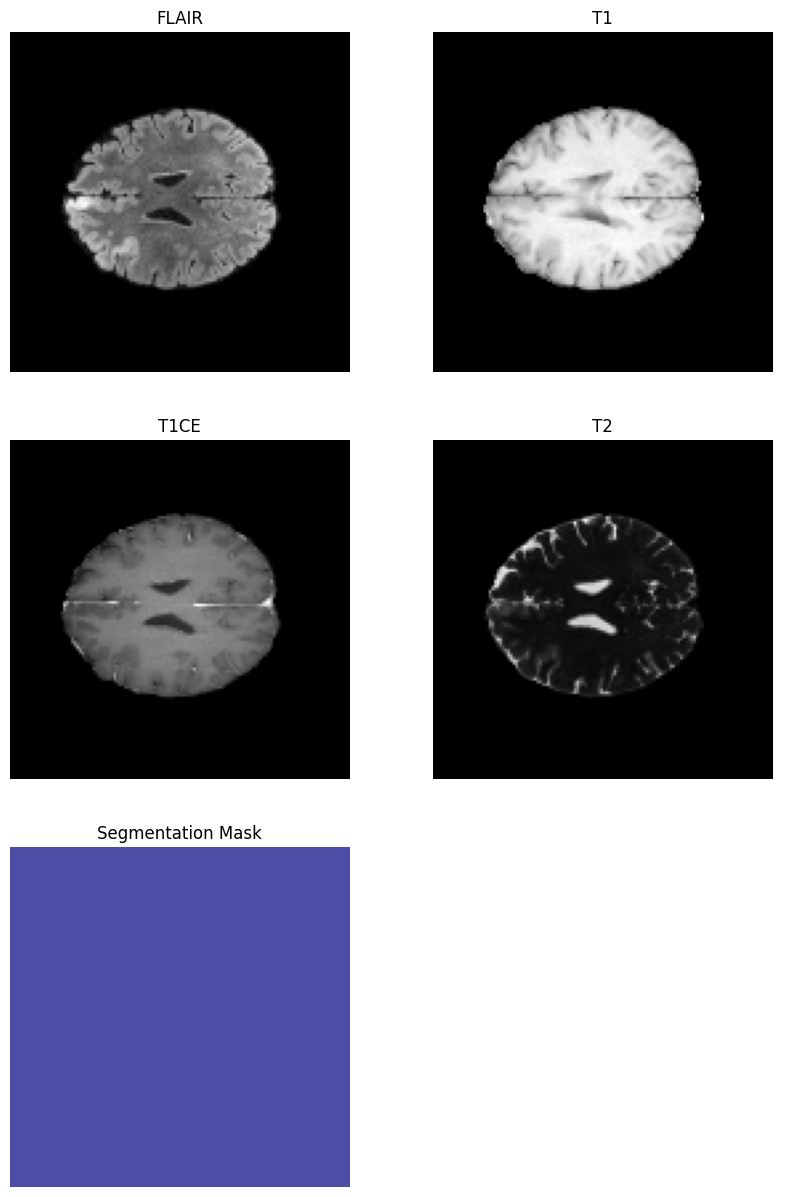

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.ndimage import zoom

def load_nifti_file(nifti_path, target_shape=(128, 128, 40, 4)):
    """Loads and resizes a NIfTI file to the required model input shape."""
    img = nib.load(nifti_path).get_fdata()  # Shape: (240, 240, 155, 4)

    # Compute zoom factors for each axis
    zoom_factors = [target_shape[i] / img.shape[i] for i in range(4)]

    # Resize the image
    resized_img = zoom(img, zoom_factors, order=1)  # Order=1 for bilinear interpolation

    return resized_img
def segment_mri(model_path, input_mri_path):
    """Loads the trained model, predicts segmentation output, and classification label."""
    model = tf.keras.models.load_model(model_path)

    # Load and resize MRI scan
    input_mri = load_nifti_file(input_mri_path)  # Now shape: (128, 128, 40, 4)

    # Add batch dimension
    input_mri = np.expand_dims(input_mri, axis=0)  # Shape: (1, 128, 128, 40, 4)

    # Predict segmentation and classification
    segmentation_output, classification_output = model.predict(input_mri)

    # Remove batch dimension from segmentation output
    segmented = segmentation_output[0]  # Shape: (128, 128, 40, 5)

    classification_label = int(classification_output[0, 0])  # 0 = LGG, 1 = GBM

    save_nifti_file(segmented, "/content/drive/MyDrive/Colab Notebooks/SEGMENTED FILES/testFile009.nii.gz")

    print(f"Segmentation Output Shape: {segmented.shape}")

    return segmented, classification_label

def save_nifti_file(data, output_path):
    """Saves a NumPy array as a NIfTI file."""
    nifti_img = nib.Nifti1Image(data, affine=np.eye(4))  # Identity affine
    nib.save(nifti_img, output_path)
    print(f"Segmented output saved as {output_path}")
def visualize_segmentation(mri_path, segmentation_output, slice_index=20):
    """Visualizes MRI modalities and the segmentation output for a specific slice."""
    mri_img = load_nifti_file(mri_path)

    fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # 3 rows, 2 columns layout
    modalities = ['FLAIR', 'T1', 'T1CE', 'T2']

    # Display MRI modalities in a 2x2 matrix
    for i in range(4):
        row = i // 2
        col = i % 2
        axes[row, col].imshow(mri_img[:, :, slice_index, i], cmap='gray')
        axes[row, col].set_title(modalities[i])
        axes[row, col].axis('off')

    # Process Segmentation Mask
    segmentation_mask = np.argmax(segmentation_output[:, :, slice_index, :], axis=-1)

    # Normalize for visualization
    if np.max(segmentation_mask) > 0:
        segmentation_mask = segmentation_mask / np.max(segmentation_mask)

    # Display segmentation result in the last position
    axes[2, 0].imshow(segmentation_mask, cmap='jet', alpha=0.7)
    axes[2, 0].set_title('Segmentation Mask')
    axes[2, 0].axis('off')

    # Remove the second column in the last row (empty space)
    axes[2, 1].axis('off')

    plt.show()
# Example Usage
model_path = "/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS/model_epoch_01.h5"  # Replace with actual model path
mri_path = "/content/drive/MyDrive/Colab Notebooks/STACKED FILES/stacked_BraTS2021_00009.nii.gz"  # Replace with actual stacked MRI file path

# Get segmented output and classification label
segmentation_output, classification_label = segment_mri(model_path, mri_path)

# Visualize the segmentation result
visualize_segmentation(mri_path, segmentation_output, slice_index=20)


Stack Files

In [ ]:
import nibabel as nib
import numpy as np
import os

def load_nifti_file(nifti_path):
    return nib.load(nifti_path).get_fdata()

def stack_mri_modalities(patient_id, base_path, output_dir):
    # Define file paths using patient ID
    modalities = ["flair", "t1", "t1ce", "t2"]
    file_paths = {mod: os.path.join(base_path, f"BraTS2021_{patient_id}", f"BraTS2021_{patient_id}_{mod}.nii.gz") for mod in modalities}

    # Load MRI scans
    images = [load_nifti_file(file_paths[mod]) for mod in modalities]

    # Ensure all images have the same shape
    if not all(img.shape == images[0].shape for img in images):
        raise ValueError("All MRI modalities must have the same shape!")

    # Stack images along the last axis to create a 4-channel image
    stacked_image = np.stack(images, axis=-1)  # Shape: (X, Y, Z, 4)

    # Define output file path
    os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists
    output_path = os.path.join(output_dir, f"stacked_BraTS2021_{patient_id}.nii.gz")

    # Save the stacked image
    nifti_img = nib.Nifti1Image(stacked_image, affine=np.eye(4))  # Identity affine
    nib.save(nifti_img, output_path)
    print(f"Stacked MRI saved as {output_path}")

    return stacked_image

# Example Usage
patient_id = "00094"  # Only enter patient number
base_path = "/content/drive/MyDrive/BraTS2021_Training_Data"
output_dir = "/content/drive/MyDrive/Colab Notebooks/STACKED FILES"

# Stack and save
stacked_image = stack_mri_modalities(patient_id, base_path, output_dir)

# Print shape of the stacked image
print(f"Stacked Image Shape: {stacked_image.shape}")  # Expected: (X, Y, Z, 4)


Stacked MRI saved as /content/drive/MyDrive/Colab Notebooks/STACKED FILES/stacked_BraTS2021_00094.nii.gz
Stacked Image Shape: (240, 240, 155, 4)


Stacked File into Model and Visualizing Segmented Mask

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Segmented output saved as /content/drive/MyDrive/Colab Notebooks/SEGMENTED FILES/testFile094.nii.gz
Segmentation Output Shape: (128, 128, 40, 5)


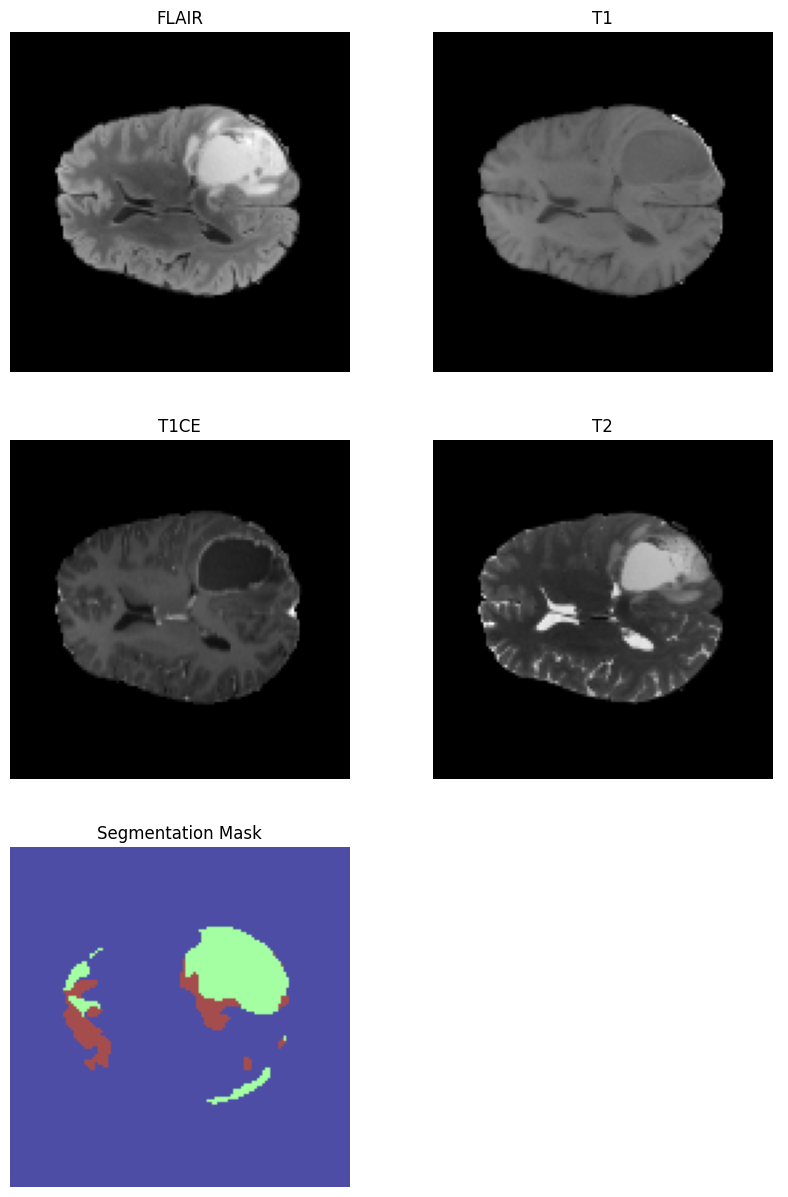

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.ndimage import zoom

def load_nifti_file(nifti_path, target_shape=(128, 128, 40, 4)):
    """Loads and resizes a NIfTI file to the required model input shape."""
    img = nib.load(nifti_path).get_fdata()  # Shape: (240, 240, 155, 4)

    # Compute zoom factors for each axis
    zoom_factors = [target_shape[i] / img.shape[i] for i in range(4)]

    # Resize the image
    resized_img = zoom(img, zoom_factors, order=1)  # Order=1 for bilinear interpolation

    return resized_img
def segment_mri(model_path, input_mri_path):
    """Loads the trained model, predicts segmentation output, and classification label."""
    model = tf.keras.models.load_model(model_path)

    # Load and resize MRI scan
    input_mri = load_nifti_file(input_mri_path)  # Now shape: (128, 128, 40, 4)

    # Add batch dimension
    input_mri = np.expand_dims(input_mri, axis=0)  # Shape: (1, 128, 128, 40, 4)

    # Predict segmentation and classification
    segmentation_output, classification_output = model.predict(input_mri)

    # Remove batch dimension from segmentation output
    segmented = segmentation_output[0]  # Shape: (128, 128, 40, 5)

    classification_label = int(classification_output[0, 0])  # 0 = LGG, 1 = GBM

    save_nifti_file(segmented, "/content/drive/MyDrive/Colab Notebooks/SEGMENTED FILES/testFile094.nii.gz")

    print(f"Segmentation Output Shape: {segmented.shape}")

    return segmented, classification_label

def save_nifti_file(data, output_path):
    """Saves a NumPy array as a NIfTI file."""
    nifti_img = nib.Nifti1Image(data, affine=np.eye(4))  # Identity affine
    nib.save(nifti_img, output_path)
    print(f"Segmented output saved as {output_path}")
def visualize_segmentation(mri_path, segmentation_output, slice_index=20):
    """Visualizes MRI modalities and the segmentation output for a specific slice."""
    mri_img = load_nifti_file(mri_path)

    fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # 3 rows, 2 columns layout
    modalities = ['FLAIR', 'T1', 'T1CE', 'T2']

    # Display MRI modalities in a 2x2 matrix
    for i in range(4):
        row = i // 2
        col = i % 2
        axes[row, col].imshow(mri_img[:, :, slice_index, i], cmap='gray')
        axes[row, col].set_title(modalities[i])
        axes[row, col].axis('off')

    # Process Segmentation Mask
    segmentation_mask = np.argmax(segmentation_output[:, :, slice_index, :], axis=-1)

    # Normalize for visualization
    if np.max(segmentation_mask) > 0:
        segmentation_mask = segmentation_mask / np.max(segmentation_mask)

    # Display segmentation result in the last position
    axes[2, 0].imshow(segmentation_mask, cmap='jet', alpha=0.7)
    axes[2, 0].set_title('Segmentation Mask')
    axes[2, 0].axis('off')

    # Remove the second column in the last row (empty space)
    axes[2, 1].axis('off')

    plt.show()
# Example Usage
model_path = "/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS/model_epoch_01.h5"  # Replace with actual model path
mri_path = "/content/drive/MyDrive/Colab Notebooks/STACKED FILES/stacked_BraTS2021_00094.nii.gz"  # Replace with actual stacked MRI file path

# Get segmented output and classification label
segmentation_output, classification_label = segment_mri(model_path, mri_path)

# Visualize the segmentation result
visualize_segmentation(mri_path, segmentation_output, slice_index=20)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, Callback
import numpy as np
import csv
import os

# Custom callback to save loss per file within each epoch to CSV
class LossLoggerCallback(Callback):
    def __init__(self, log_dir):
        super().__init__()  # Initialize parent class
        self.log_dir = log_dir
        os.makedirs(self.log_dir, exist_ok=True)  # Ensure directory exists
        self.csv_file = os.path.join(self.log_dir, "loss_log2.csv")
        self.current_epoch = 0  # Track epoch manually

        if not os.path.exists(self.csv_file):
            with open(self.csv_file, "w", newline="") as f:
                writer = csv.writer(f)
                writer.writerow(["Epoch", "Batch", "Loss"])

    def on_epoch_begin(self, epoch, logs=None):
        self.current_epoch = epoch + 1  # Update epoch number

    def on_train_batch_end(self, batch, logs=None):
        if logs is None:
            logs = {}
        loss = logs.get("loss", 0)  # Ensure loss is not None
        with open(self.csv_file, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([self.current_epoch, batch + 1, loss])

# Define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath="/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS/best_model.h5",
    save_weights_only=False,
    save_best_only=True,
    monitor="val_loss",
    mode="min",
    verbose=1
)

loss_logger_callback = LossLoggerCallback("/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS")

csv_logger_callback = CSVLogger(
    filename="/content/drive/MyDrive/Brain Tumor Files/MODEL LOGS/training_log.csv",
    separator=",",
    append=True  # Append logs instead of overwriting
)

early_stopping_callback = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Combine all callbacks
callbacks = [
    checkpoint_callback,
    loss_logger_callback,
    csv_logger_callback,
    early_stopping_callback
]
